In [1]:
!git clone https://github.com/GustavoMourao/eye-Image-Analysis
!pip install -U efficientnet==0.0.4
!pip install pillow==4.0.0
!pip install keras

fatal: destination path 'eye-Image-Analysis' already exists and is not an empty directory.
  Running setup.py bdist_wheel for efficientnet ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5c/34/68/a611a699a28239e964ccf144c0e767cdb5439fee82ec5de6e0
Successfully built efficientnet
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 5.6MB 8.5MB/s eta 0:00:01
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 378kB 36.8MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%ls -la

total 496
drwxrwxr-x 16 ec2-user ec2-user   4096 Jan  6 14:54 ./
drwxr-xr-x  5 ec2-user ec2-user   4096 Jan  6 18:04 ../
drwxrwxr-x  5 ec2-user ec2-user   4096 Dec 13 01:48 Data/
drwxrwxr-x  4 ec2-user ec2-user   4096 Dec 13 01:48 Database/
drwxrwxr-x  5 ec2-user ec2-user   4096 Dec 13 01:48 Data_equalized/
drwxrwxr-x  3 ec2-user ec2-user   4096 Dec 13 01:48 Data_partial_excluded/
drwxrwxr-x  3 ec2-user ec2-user   4096 Dec 13 01:48 Data_Suspect/
drwxrwxr-x  8 ec2-user ec2-user   4096 Dec 17 17:59 efficientnet_keras_transfer_learning/
-rw-rw-r--  1 ec2-user ec2-user   1487 Dec 13 01:48 evaluation_test.py
drwxrwxr-x 13 ec2-user ec2-user   4096 Jan  1 13:29 eye-Image-Analysis/
drwxrwxr-x  8 ec2-user ec2-user   4096 Jan  6 18:19 .git/
-rw-rw-r--  1 ec2-user ec2-user   1212 Dec 13 01:48 .gitignore
-rw-rw-r--  1 ec2-user ec2-user   4829 Dec 17 18:54 Graphs.py
-rw-rw-r--  1 ec2-user ec2-user   4201 Dec 17 17:59 Graphs.pyc
-rw-rw-r--  1 ec2-user ec2-user  24304 Jan  6 14:53 Interpreter.py
-rw-

In [3]:
from Interpreter import Interpreter

Using TensorFlow backend.


### Import set of data from repository

In [4]:
TARGET_SIZE = (512, 512)
BATCH_SIZE = 8
EPOCHS = 100
IMAGE_SHAPE_EFFI = (512, 512, 3)

inter = Interpreter(
    BATCH_SIZE,
    IMAGE_SHAPE_EFFI,
    EPOCHS,
    TARGET_SIZE
)


In [5]:
train_images, validation_images, test_images = inter.split_data()

Found 706 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 94 images belonging to 2 classes.


### Train Resnet v1 model

In [6]:
n = 3
depth = n * 6 + 2
model, model_out = inter.resnet_v1(
    input_shape=IMAGE_SHAPE_EFFI,
    depth=depth,
    train_images=train_images,
    test_images=test_images,
    'Nadam',
    validation_images=validation_images
)

Instructions for updating:
Colocations handled automatically by placer.


ValueError: Could not interpret optimizer identifier: <tensorflow.python.keras.optimizers.RMSprop object at 0x7ff79132b470>

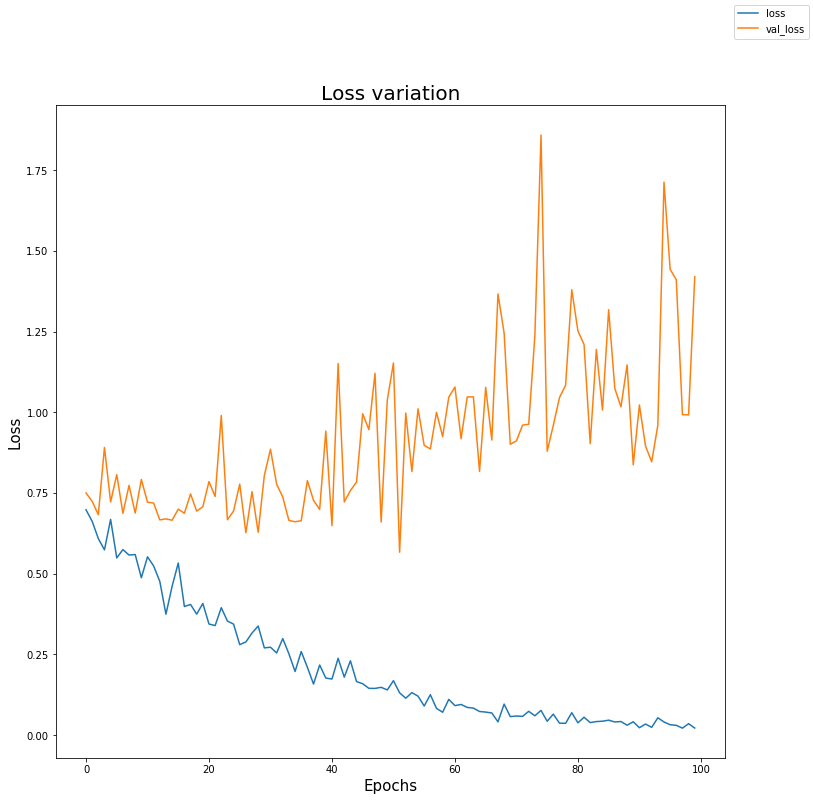

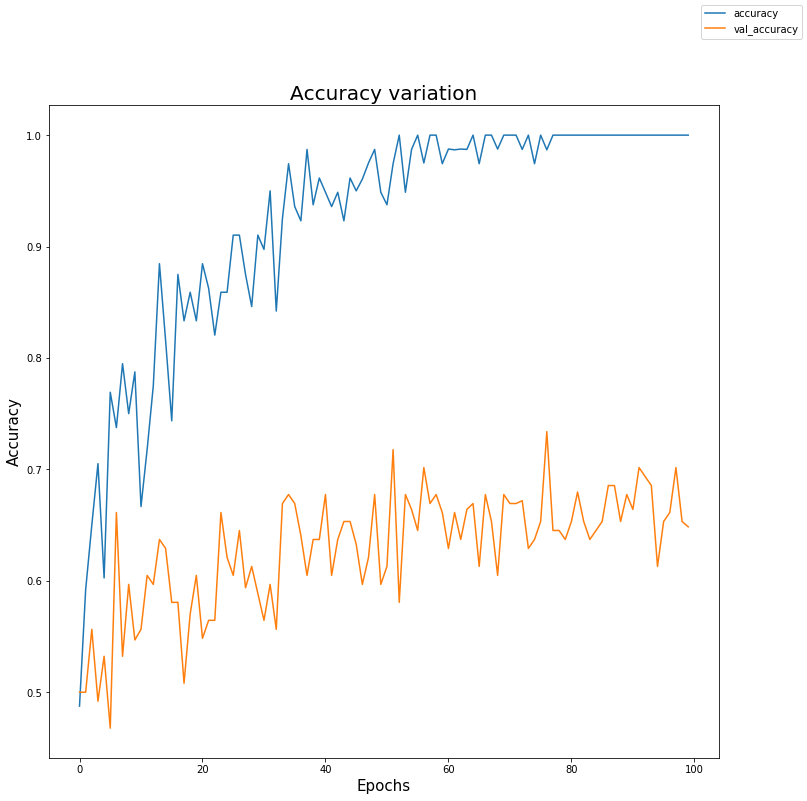

Normalized confusion matrix
[[0.55319149 0.44680851]
 [0.44680851 0.55319149]]


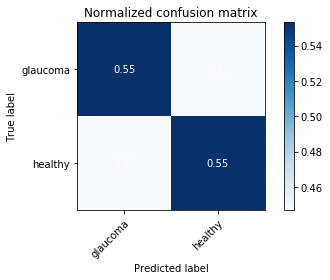

Accuracy: 

0.5531914893617021


In [43]:
# Get score of test data from trained model.
inter.model_evaluation_test(
    test_images,
    validation_images,
    model,
    model_out    
)

### Train traditional model

In [7]:
# Traditional method.
model, model_out = inter.train_model(
    test_images,
    validation_images,
    'Nadam',
    64
)

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_29/convolution' (op: 'Conv2D') with input shapes: [?,1,1,80], [3,3,80,80].

In [ ]:
inter.model_evaluation_test(
    test_images,
    validation_images,
    model,
    model_out
)